# Импорты

In [11]:
import numpy as np
from numpy.linalg import LinAlgError
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Встроенные модели

## **0. Линейная регрессия**

---
### **Когда использовать?**  
Когда целевая переменная (зависимая переменная) — **непрерывная** (например, цена дома, температура, зарплата).  

---
### **Что важно?**  
- `model.coef_` — веса признаков (в простом случае — наклон прямой).  
- `model.intercept_` — свободный член (сдвиг по оси Y).  
- **Метрики**:  
  - `mean_squared_error` (MSE) — средняя квадратичная ошибка (чем меньше, тем лучше).  
  - `r2_score` (R²) — коэффициент детерминации (1 — идеальное предсказание, 0 — как среднее).  


In [12]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

---

In [13]:
# Генерация данных R->R
X, y = make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

In [14]:
model = LinReg()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"MSE = {MSE}, R^2 = {R2}")

fig.add_scatter(
    x=X_train.reshape(-1),
    y=model.predict(X_train),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тренировочный) набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_pred,
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

MSE = 101.0077156966921, R^2 = 0.9726379442654388


In [15]:
# Генерация данных R^n->R
X, y = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=7,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinReg()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"MSE = {MSE}, R^2 = {R2}")

MSE = 110.55332562120294, R^2 = 0.9907627157210539


### Использование полиномиальных фич для нелинейной зависимости

In [16]:
X = np.linspace(-5, 5, 200)
y = np.sin(X) + np.random.normal(-0.1, 0.1, 200)
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

In [17]:
model_lin = LinReg()

model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

MSE_lin = mean_squared_error(y_pred=y_pred_lin, y_true=y_test)
R2_lin = r2_score(y_pred=y_pred_lin, y_true=y_test)
print(f"MSE = {MSE_lin}, R^2 = {R2_lin}")

fig.add_scatter(
    x=X.reshape(-1),
    y=model_lin.predict(X),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный набор (без PolynomialFeatures)"
)

MSE = 0.6081482467051073, R^2 = -0.003013377016594543


In [18]:
poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model_poly = LinReg()

model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

MSE_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test)
R2_poly = r2_score(y_pred=y_pred_poly, y_true=y_test)
print(f"MSE = {MSE_poly}, R^2 = {R2_poly}")

fig.add_scatter(
    x=X.reshape(-1),
    y=model_poly.predict(X_poly),
    mode='lines',
    line=dict(color='green'),
    name="Предсказанный набор (с PolynomialFeatures)"
)

MSE = 0.019041366343028165, R^2 = 0.9685952475203109


---


## **1. Логистическая регрессия**  

---
### **Когда использовать?**  
Когда целевая переменная — **категориальная** (бинарная: 0/1, Да/Нет; или мультиклассовая: "кошка", "собака", "птица").  

---
### **Что важно?**  
- `predict_proba()` — возвращает вероятности классов (полезно для оценки уверенности модели).  
- **Метрики**:  
  - `accuracy_score` — доля правильных ответов.  
  - `confusion_matrix` — матрица ошибок (TN, FP, FN, TP).  
  - `classification_report` — precision, recall, F1-score.  

---
### **Плюсы и минусы**  

#### ✅ **Плюсы:**  
1. Простота и интерпретируемость
2. Быстрое обучение и предсказание  
3. Эффективна на малых данных
4. Поддержка регуляризации (L1/L2)  
5. Выход — вероятность класса

#### ❌ **Минусы:**  
1. Линейные границы решений
2. Чувствительность к выбросам
3. Проблемы с несбалансированными классами
4. Предполагает линейную зависимость log-odds от признаков
5. Не подходит для сложных нелинейных данных

In [19]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---

#### **Граничная функция y=x**

In [20]:
func = np.linspace(-5, 5, 500)
X = np.array([func, func + np.random.normal(-2, 2, 500)]).T
y = np.array([1 if x[1] < x[0] else 0 for x in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

In [21]:
model = LogReg()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")

fig.add_scatter(
    x=X[:, 0][model.predict(X)==0],
    y=X[:, 1][model.predict(X)==0],
    mode='markers',
    marker=dict(color='green', size=7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X)==1],
    y=X[:, 1][model.predict(X)==1],
    mode='markers',
    marker=dict(color='gray', size=7),
    name="Класс '1' (предсказанный)"
)

accuracy_score: 0.9866666666666667
confusion_matrix:
[[ 19   2]
 [  0 129]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.98      1.00      0.99       129

    accuracy                           0.99       150
   macro avg       0.99      0.95      0.97       150
weighted avg       0.99      0.99      0.99       150



#### **Граничная фукнция y=Sin(x)**

In [22]:
# генерация данных для классификации
func = np.linspace(-5, 5, 500)
X = np.array([func, np.sin(func) + np.random.normal(-2, 2, 500)]).T
y = np.array([1 if x[1] < np.sin(x[0]) else 0 for x in X])

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

In [23]:
poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LogReg()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==0],
    y=X[:, 1][model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='green', size=7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==1],
    y=X[:, 1][model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='gray', size=7),
    name="Класс '1' (предсказанный)"
)

accuracy_score: 0.9733333333333334
confusion_matrix:
[[ 27   4]
 [  0 119]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.97      1.00      0.98       119

    accuracy                           0.97       150
   macro avg       0.98      0.94      0.96       150
weighted avg       0.97      0.97      0.97       150



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



---

## **2. K-ближайших соседей (KNN)**  

---
### **Когда использовать?**  
- Для **классификации** (бинарной или многоклассовой).
- Когда данные имеют **локальную структуру** (близкие объекты похожи).  

---
### **Что важно?**  
- `n_neighbors` – количество соседей (`k`). Чем меньше `k`, тем сложнее модель (риск переобучения).  
- `weights` – взвешивание соседей (`uniform` – все равны, `distance` – ближе = важнее).  
- `metric` – метрика расстояния (`euclidean`, `manhattan`, `minkowski`).  

**Метрики** (аналогично логистической регрессии):  
- `accuracy_score` – общая точность.  
- `confusion_matrix` – матрица ошибок.  
- `classification_report` – precision, recall, F1.  

---
### **Плюсы и минусы**  
✅ **Плюсы**:  
- Простота интерпретации.  
- Не требует обучения (ленивый алгоритм).  
- Хорошо работает на небольших данных с явной локальной структурой.  

❌ **Минусы**:  
- Медленный на больших данных (нужно хранить весь датасет).  
- Чувствителен к шумам и выбросам.  
- Требует подбора `k` и метрики расстояния.  

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits

---

In [25]:
digits = load_digits()
X = [matrix.flatten().tolist() for matrix in digits.images]
y = digits.target

fig = sp.make_subplots(rows=6, cols=6, horizontal_spacing=0.01, vertical_spacing=0.01)

for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_trace(
        go.Heatmap(
            z=digits.images[i][::-1,:],
            colorscale='gray',
            showscale=False,
            hoverinfo='z'
        ),
        row=row, col=col
    )

    fig.add_annotation(
        x=0, y=7,
        text=str(y[i]),
        showarrow=False,
        font=dict(color='red', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.update_layout(
    title='Первые 36 цифр датасета (6x6)',
    width=800,
    height=800,
    margin=dict(l=20, r=20, b=20, t=40),
    plot_bgcolor='white',
    showlegend=False
)

for i in range(1, 37):
    fig.update_xaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)
    fig.update_yaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)

fig.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNN(n_neighbors=3)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9851851851851852


In [27]:
for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_annotation(
        x=1, y=7,
        text=str(model.predict(X[:36])[i]),
        showarrow=False,
        font=dict(color='blue', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.show()

---

## **3. Наивный Байесовский классификатор (Naive Bayes)**  
---
### **Когда использовать?**  
- Для **классификации текстов** (спам/не спам, категоризация документов).  
- Когда нужна **быстрая работа** на больших данных.  
- Если признаки **условно независимы** (наивное предположение).  
- Для задач с **высокой размерностью** (много признаков).  

---
### **Что важно?**  
#### **Основные варианты в sklearn:**  
1. **GaussianNB**  
   - Для непрерывных данных (предполагает нормальное распределение).  
   ```python
   from sklearn.naive_bayes import GaussianNB
   model = GaussianNB()
   ```

2. **MultinomialNB**  
   - Для дискретных данных (частоты слов, категории).  
   ```python
   from sklearn.naive_bayes import MultinomialNB
   model = MultinomialNB(alpha=1.0)  # alpha - параметр сглаживания
   ```

3. **BernoulliNB**  
   - Для бинарных признаков (есть/нет слова в тексте).  
   ```python
   from sklearn.naive_bayes import BernoulliNB
   model = BernoulliNB(binarize=0.5)
   ```

#### **Ключевые параметры:**  
- `alpha` – параметр сглаживания (защита от нулевых вероятностей).  
- `fit_prior` – учитывать ли априорные вероятности классов.  

#### **Метрики:**  
- `accuracy_score` – общая точность.  
- `precision_recall_fscore_support` – для несбалансированных данных.  

---
## **Плюсы и минусы**  
✅ **Плюсы:**  
- Крайне **быстрое обучение** и предсказание.  
- Хорошо работает с **высокомерными данными** (например, тексты).  
- **Мало параметров** для настройки.  
- Устойчив к **нерелевантным признакам**.  

❌ **Минусы:**  
- Наивное предположение о **независимости признаков** (редко выполняется).  
- Плохо обрабатывает **зависимости между признаками**.  
- Для GaussianNB важно **нормальное распределение** данных.  


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

---

In [29]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='blue'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Точность:", accuracy_score(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность: 0.8947368421052632

Матрица ошибок:
[[11  0  0]
 [ 0 11  3]
 [ 0  1 12]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.79      0.85        14
           2       0.80      0.92      0.86        13

    accuracy                           0.89        38
   macro avg       0.91      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



In [31]:
fig.add_scatter3d(
    x=X[:,0][model.predict(X)==0],
    y=X[:,1][model.predict(X)==0],
    z=X[:,2][model.predict(X)==0],
    mode='markers',
    marker=dict(color='lightblue', size=3),
    name="Предсказанный ласс 0"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==1],
    y=X[:,1][model.predict(X)==1],
    z=X[:,2][model.predict(X)==1],
    mode='markers',
    marker=dict(color='purple', size=3),
    name="Предсказанный класс 1"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==2],
    y=X[:,1][model.predict(X)==2],
    z=X[:,2][model.predict(X)==2],
    mode='markers',
    marker=dict(color='yellow', size=3),
    name="Предсказанный класс 2"
)

---

## **4. Дерево решений (Decision Tree Classifier)**  
---
### **Когда использовать?**  
- Для **классификации** (бинарной или многоклассовой).  
- Когда важна **интерпретируемость** (можно визуализировать правила).  
- Если данные **нелинейны** или содержат сложные зависимости.

---
### **Что важно?**  
#### **Основные параметры:**  
- `max_depth` – максимальная глубина дерева (чем больше, тем сложнее модель).  
- `criterion` – критерий разделения:  
  - `'gini'` (индекс Джини) – по умолчанию.  
  - `'entropy'` – информационный выигрыш.  
- `min_samples_split` – минимальное число образцов для разделения узла (например, 5).  
- `min_samples_leaf` – минимальное число образцов в листе (например, 2).  

#### **Метрики (аналогично KNN и логистической регрессии):**  
- `accuracy_score` – общая точность.  
- `confusion_matrix` – матрица ошибок.  
- `classification_report` – precision, recall, F1.  

#### **Визуализация дерева:**  
```python
from sklearn.tree import plot_tree
plot_tree(model, filled=True, feature_names=['Feature_1', 'Feature_2'])
```
- `filled=True` – раскрашивает узлы по классам.  
- `feature_names` – подписи признаков.  

---
## **Плюсы и минусы**  
✅ **Плюсы:**  
- Простота интерпретации (можно увидеть правила).  
- Работает с категориальными и числовыми данными без предобработки.  
- Не требует масштабирования признаков.  

❌ **Минусы:**  
- Склонен к переобучению (без ограничений глубины).  
- Нестабилен (малые изменения данных → другое дерево).  
- Плохо экстраполирует за пределы обучающих данных.  


In [32]:
from sklearn.tree import DecisionTreeClassifier as Tree, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

---

In [33]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='blue'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [34]:
model = Tree(max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X)

print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 1.0


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.664\nsamples = 112\nvalue = [34, 42, 36]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.497\nsamples = 78\nvalue = [0, 42, 36]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.194\nsamples = 46\nvalue = [0, 41, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25,

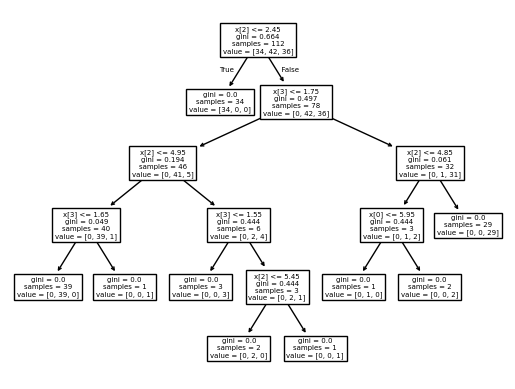

In [35]:
plot_tree(model)

In [36]:
fig.add_scatter3d(
    x=X[:,0][y_pred==0],
    y=X[:,1][y_pred==0],
    z=X[:,2][y_pred==0],
    mode='markers',
    marker=dict(color='lightblue', size=3),
    name="Предсказанный ласс 0"
)

fig.add_scatter3d(
    x=X[:,0][y_pred==1],
    y=X[:,1][y_pred==1],
    z=X[:,2][y_pred==1],
    mode='markers',
    marker=dict(color='purple', size=3),
    name="Предсказанный класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y_pred==2],
    y=X[:,1][y_pred==2],
    z=X[:,2][y_pred==2],
    mode='markers',
    marker=dict(color='yellow', size=3),
    name="Предсказанный класс 2"
)

---

# Реализация приведенных моделей

## **1. Логистическая регрессия (+ линейная)**

In [37]:
class LinearRegression:
    def __init__(self, fit_intercept=True, penalty=None, alpha=1.0, l1_ratio=0.5,
                 solver='analytic', lr=0.01, max_iter=1000, tol=1e-4):
        """
        Параметры:
        - fit_intercept: bool - добавлять ли intercept (смещение)
        - penalty: None, 'l1', 'l2', 'elasticnet' - тип регуляризации
        - alpha: float - коэффициент регуляризации
        - l1_ratio: float [0,1] - соотношение L1/L2 для elasticnet
        - solver: 'analytic' (только для L2/None) или 'gd' - метод решения
        - lr: float - скорость обучения (для градиентного спуска)
        - max_iter: int - макс. итераций (для градиентного спуска)
        - tol: float - критерий остановки (для градиентного спуска)
        """
        self.fit_intercept = fit_intercept
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.solver = solver
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []

    def _add_intercept(self, X):
        """Добавляет столбец единиц для intercept"""
        return np.c_[np.ones(X.shape[0]), X]

    def _soft_threshold(self, x, threshold):
        """Оператор soft-thresholding для L1-регуляризации"""
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def fit(self, X: np.array, y: np.array):
        """Обучение модели"""
        if self.fit_intercept:
            X = self._add_intercept(X)

        if self.solver == 'analytic' and self.penalty in [None, 'l2']:
            self._fit_analytic(X, y)
        else:
            self._fit_iterative(X, y)

        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0

    def _fit_analytic(self, X, y):
        """Аналитическое решение (только для L2 или без регуляризации)"""
        try:
            if self.penalty == 'l2':
                identity = np.eye(X.shape[1])
                if self.fit_intercept:
                    identity[0, 0] = 0
                self.coef_ = np.linalg.inv(X.T @ X + self.alpha * identity) @ X.T @ y
            else:
                self.coef_ = np.linalg.pinv(X.T @ X) @ X.T @ y
        except LinAlgError:
            raise LinAlgError("Матрица сингулярна. Попробуйте solver='gd' или penalty='l2'")

    def _fit_iterative(self, X, y):
        """Итеративные методы (градиентный спуск) для всех типов регуляризации"""
        n_samples, n_features = X.shape
        self.coef_ = np.random.random(size=n_features)

        for i in range(self.max_iter):
            y_pred = X @ self.coef_
            error = y_pred - y
            grad = X.T @ error / n_samples

            if self.penalty == 'l1':
                self.coef_ = self._soft_threshold(
                    self.coef_ - self.lr * grad,
                    self.lr * self.alpha
                )
            elif self.penalty == 'l2':
                grad += (self.alpha / n_samples) * self.coef_
                if self.fit_intercept:
                    grad[0] = 0
                self.coef_ -= self.lr * grad
            elif self.penalty == 'elasticnet':
                l1_part = self.alpha * self.l1_ratio * np.sign(self.coef_)
                l2_part = self.alpha * (1 - self.l1_ratio) * self.coef_
                grad += (l1_part + l2_part) / n_samples
                if self.fit_intercept:
                    grad[0] = 0
                self.coef_ -= self.lr * grad
            else:
                self.coef_ -= self.lr * grad

            loss = np.mean(error ** 2)
            if self.penalty == 'l1':
                loss += self.alpha * np.sum(np.abs(self.coef_))
            elif self.penalty == 'l2':
                loss += (self.alpha / 2) * np.sum(self.coef_ ** 2)
            elif self.penalty == 'elasticnet':
                loss += self.alpha * (self.l1_ratio * np.sum(np.abs(self.coef_)) +
                                    (1 - self.l1_ratio) * np.sum(self.coef_ ** 2))

            self.loss_history.append(loss)

            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X: np.array):
        """Предсказание"""
        if self.fit_intercept:
            return X @ self.coef_ + self.intercept_
        return X @ self.coef_

    def score(self, X: np.array, y: np.array):
        """R^2 score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def get_params(self):
        """Возвращает параметры модели"""
        return {
            'coef': self.coef_,
            'intercept': self.intercept_,
            'loss_history': self.loss_history
        }

In [87]:
class LogisticRegression:
    def __init__(self, fit_intercept=True, penalty=None, alpha=1.0, l1_ratio=0.5,
                 lr=0.001, max_iter=10000, tol=1e-7, random_state=None):
        """
        Параметры:
        - fit_intercept: bool - добавлять ли intercept (смещение)
        - penalty: None, 'l1', 'l2', 'elasticnet' - тип регуляризации
        - alpha: float - коэффициент регуляризации
        - l1_ratio: float [0,1] - соотношение L1/L2 для elasticnet
        - lr: float - скорость обучения
        - max_iter: int - максимальное количество итераций
        - tol: float - критерий остановки (разница потерь)
        - random_state: int - для воспроизводимости
        """
        self.fit_intercept = fit_intercept
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None
        self.loss_history = []

    def _add_intercept(self, X):
        """Добавляет столбец единиц для intercept"""
        return np.c_[np.ones(X.shape[0]), X]

    def _sigmoid(self, z):
        """Сигмоидная функция с защитой от переполнения"""
        return 1 / (1 + np.exp(-z))

    def _soft_threshold(self, x, threshold):
        """Оператор soft-thresholding для L1-регуляризации"""
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def fit(self, X, y):
        """Обучение модели"""
        self.classes_ = np.unique(y)
        assert len(self.classes_) == 2, "Только бинарная классификация"
        y = np.where(y == self.classes_[1], 1, 0)

        if self.fit_intercept:
            X = self._add_intercept(X)

        rng = np.random.RandomState(self.random_state)
        self.coef_ = rng.normal(scale=0.1, size=X.shape[1])

        for i in range(self.max_iter):
            z = X @ self.coef_
            y_pred = self._sigmoid(z)

            grad = X.T @ (y_pred - y) / len(y)

            if self.penalty == 'l1':
                reg = self.alpha * np.sign(self.coef_)
                if self.fit_intercept:
                    reg[0] = 0
                self.coef_ = self._soft_threshold(
                    self.coef_ - self.lr * grad,
                    self.lr * reg
                )
            elif self.penalty == 'l2':
                reg = (self.alpha / len(y)) * self.coef_
                if self.fit_intercept:
                    reg[0] = 0
                grad += reg
                self.coef_ -= self.lr * grad
            elif self.penalty == 'elasticnet':
                l1_part = self.alpha * self.l1_ratio * np.sign(self.coef_)
                l2_part = self.alpha * (1 - self.l1_ratio) * self.coef_
                if self.fit_intercept:
                    l1_part[0] = l2_part[0] = 0
                grad += (l1_part + l2_part) / len(y)
                self.coef_ -= self.lr * grad
            else:
                self.coef_ -= self.lr * grad

            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1-y) * np.log(1-y_pred + 1e-15))
            if self.penalty == 'l1':
                loss += self.alpha * np.sum(np.abs(self.coef_[1:] if self.fit_intercept else self.coef_))
            elif self.penalty == 'l2':
                loss += (self.alpha / 2) * np.sum(self.coef_[1:]**2 if self.fit_intercept else self.coef_**2)
            elif self.penalty == 'elasticnet':
                loss += self.alpha * (self.l1_ratio * np.sum(np.abs(self.coef_[1:] if self.fit_intercept else self.coef_) +
                 (1-self.l1_ratio) * np.sum(self.coef_[1:]**2 if self.fit_intercept else self.coef_**2)))

            self.loss_history.append(loss)

            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0

        return self

    def predict_proba(self, X):
        """Вероятности принадлежности к положительному классу"""
        if not hasattr(self, 'coef_'):
            raise Exception("Модель еще не обучена!")

        if self.fit_intercept:
            return self._sigmoid(X @ self.coef_ + self.intercept_)
        return self._sigmoid(X @ self.coef_)

    def predict(self, X, threshold=0.5):
        """Предсказание классов"""
        proba = self.predict_proba(X)
        return np.where(proba >= threshold, self.classes_[1], self.classes_[0])

    def score(self, X, y):
        """Точность классификации"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def get_params(self, deep=True):
        """Возвращает параметры модели"""
        return {
            'fit_intercept': self.fit_intercept,
            'penalty': self.penalty,
            'alpha': self.alpha,
            'l1_ratio': self.l1_ratio,
            'lr': self.lr,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        """Устанавливает параметры модели"""
        for param, value in params.items():
            setattr(self, param, value)
        return self

### **Сравнение с sklearn**

In [39]:
X, y = make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)
model = LinReg()
my_model = LinearRegression()

model.fit(X_train, y_train)
my_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
my_y_pred = my_model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"sklearn: MSE = {MSE}, R^2 = {R2}")
print("coef:",model.coef_, model.intercept_)

my_MSE = mean_squared_error(y_pred=my_y_pred, y_true=y_test)
my_R2 = r2_score(y_pred=my_y_pred, y_true=y_test)
print(f"my: MSE = {my_MSE}, R^2 = {my_R2}")
print("coef:",my_model.coef_, my_model.intercept_)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=my_y_pred,
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_pred,
    mode='lines',
    line=dict(color='yellow', dash='dash'),
    name="Предсказанный sklearn (тестовый) набор"
)

sklearn: MSE = 101.0077156966921, R^2 = 0.9726379442654388
coef: [63.57340499] -0.4286145983592635
my: MSE = 101.00771569669215, R^2 = 0.9726379442654387
coef: [63.57340499] -0.42861459835926075


In [40]:
X = np.linspace(-5, 5, 200)
y = np.sin(X) + np.random.normal(-0.1, 0.1, 200)
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LinReg()
my_model = LinearRegression()

model.fit(X_train, y_train)
my_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
my_y_pred = my_model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"sklearn: MSE = {MSE}, R^2 = {R2}")
print("coef:",model.coef_, model.intercept_)

my_MSE = mean_squared_error(y_pred=my_y_pred, y_true=y_test)
my_R2 = r2_score(y_pred=my_y_pred, y_true=y_test)
print(f"my: MSE = {my_MSE}, R^2 = {my_R2}")
print("coef:",my_model.coef_, my_model.intercept_)

fig.add_scatter(
    x=X_poly[:,1].reshape(-1),
    y=my_model.predict(X_poly),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

fig.add_scatter(
    x=X_poly[:,1].reshape(-1),
    y=model.predict(X_poly),
    mode='lines',
    line=dict(color='yellow', dash='dash'),
    name="Предсказанный sklearn (тестовый) набор"
)

sklearn: MSE = 0.017996218965930472, R^2 = 0.9700028803603014
coef: [ 0.00000000e+00  8.31340726e-01  5.15921082e-03 -1.08262707e-01
 -2.28517791e-04  2.74566922e-03 -1.00837153e-06] -0.10573525433534564
my: MSE = 0.017996218966070756, R^2 = 0.9700028803600674
coef: [-5.28676271e-02  8.31340726e-01  5.15921080e-03 -1.08262707e-01
 -2.28517790e-04  2.74566922e-03 -1.00837157e-06] -0.0528676271444482


In [88]:
func = np.linspace(-5, 5, 1000)
X = np.array([func, np.sin(func) + np.random.normal(0, 2, 1000)]).T
y = np.array([1 if x[1] < np.sin(x[0]) else 0 for x in X])

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LogReg()
my_model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

my_model.fit(X_train, y_train)
my_y_pred = my_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

my_accuracy = accuracy_score(y_test, my_y_pred)
my_conf_matrix = confusion_matrix(y_test, my_y_pred)
my_conf_matrix2 = confusion_matrix(y_train, my_model.predict(X_train))
my_report = classification_report(y_test, my_y_pred)

print(f"sklearn: accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")
print(f"coef: {model.coef_} {model.intercept_}")

print(f"my: accuracy_score: {my_accuracy}\nconfusion_matrix:\n{my_conf_matrix}\nconfusion_matrix2:\n{my_conf_matrix2}\nclassification_report:\n{my_report}")
print(f"coef: {my_model.coef_} {my_model.intercept_}")

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==0],
    y=X[:, 1][model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='green', size=7, opacity = 0.7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==1],
    y=X[:, 1][model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='gray', size=7, opacity = 0.7),
    name="Класс '1' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][my_model.predict(X_poly)==0],
    y=X[:, 1][my_model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='purple', size=7, opacity = 0.7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][my_model.predict(X_poly)==1],
    y=X[:, 1][my_model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='yellow', size=7, opacity = 0.7),
    name="Класс '1' (предсказанный)"
)

fig.add_scatter(
    x=X[:,1].reshape(-1),
    y=X_poly @ my_model.coef_ + my_model.intercept_,
    mode='markers',
    marker=dict(color='yellow', size=9),
    name="Предсказанный sklearn (тестовый) набор"
)

fig.add_scatter(
    x=X[:,1].reshape(-1),
    y=X_poly @ model.coef_[0] + model.intercept_[0],
    mode='markers',
    marker=dict(color='pink', size=9),
    name="Предсказанный sklearn (тестовый) набор"
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-input-87-6cd5f8e038d8>:37: RuntimeWarning:

overflow encountered in exp



sklearn: accuracy_score: 0.9833333333333333
confusion_matrix:
[[144   2]
 [  3 151]]
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       146
           1       0.99      0.98      0.98       154

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

coef: [[ 1.93732035e-03  5.83788549e-01 -2.23278909e-01  3.06120035e-02
   3.85390373e-02 -4.82799539e-02  1.84271591e+00 -2.14442631e-01
   1.61829554e-01 -5.38475143e-01 -4.26964665e-02  1.91553029e-01
   3.92400830e-03  7.53577186e-02 -1.66612765e-01 -2.12792052e-01
  -3.62283376e-01  5.74111223e-01 -1.33263778e+00  7.77412826e-02
  -3.06548232e+00 -5.51353717e-04 -1.61025775e-02  1.27474596e-01
   2.30769128e-01 -5.58492077e-01 -1.57744184e-01 -2.76636947e-01]] [0.00200635]
my: accuracy_score: 0.94
confusion_matrix:
[[132  14]
 [  4 150]]
confusion_matrix

<ipython-input-87-6cd5f8e038d8>:37: RuntimeWarning:

overflow encountered in exp

<ipython-input-87-6cd5f8e038d8>:37: RuntimeWarning:

overflow encountered in exp



In [60]:
fig = go.Figure()

fig.add_scatter(y=my_model.loss_history, x=np.array(range(len(my_model.loss_history))), mode="lines", line=dict(color='blue'))

## **2. K-ближайших соседей**

### **Сравнение с sklearn**

## **3. Наивный Байесовский классификатор**

### **Сравнение с sklearn**

## **4. Дерево решений**

### **Сравнение с sklearn**